In [237]:
import os

In [238]:
data_dir='/home/ubuntu/Documents/CNNPRO/cell_images'

In [239]:
os.listdir(data_dir)

['train', 'test']

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
from matplotlib.image import imread

In [242]:
test_path=data_dir+'/test/'
train_path=data_dir+'/train/'

In [243]:
test_path

'/home/ubuntu/Documents/CNNPRO/cell_images/test/'

In [244]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [245]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [310]:
os.listdir(train_path+'parasitized')[0]

'C146P107ThinF_IMG_20151018_134554_cell_254.png'

In [247]:
para_cell=train_path+'parasitized/'+'C146P107ThinF_IMG_20151018_134554_cell_254.png'

In [248]:
para_cell

'/home/ubuntu/Documents/CNNPRO/cell_images/train/parasitized/C146P107ThinF_IMG_20151018_134554_cell_254.png'

In [249]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [250]:
imread(para_cell).shape

(124, 121, 3)

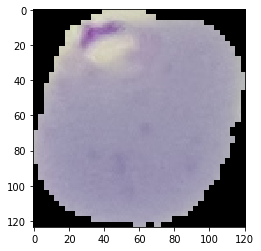

In [251]:
plt.imshow(imread(para_cell))

In [252]:
os.listdir(train_path+'uninfected')[0]

'C234ThinF_IMG_20151112_162909_cell_7.png'

In [314]:
uninfected_cell=train_path+'uninfected/'+'C234ThinF_IMG_20151112_162909_cell_7.png'

In [315]:
uninfected1_cell=imread(uninfected_cell)

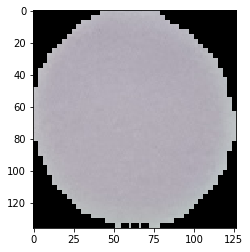

In [316]:
plt.imshow(uninfected1_cell)

In [256]:
len(os.listdir(train_path+'parasitized'))

12480

In [257]:
len(os.listdir(train_path+'uninfected'))

12480

In [258]:
len(os.listdir(test_path+'parasitized'))

1300

In [259]:
len(os.listdir(test_path+'uninfected'))

1300

In [260]:
dim1=[]
dim2=[]
for image_filename in os.listdir(test_path+'uninfected'):
    img=imread(test_path+'uninfected/'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [261]:
dim1
#Dimiensions are different for different images

[115,
 118,
 130,
 142,
 124,
 160,
 100,
 100,
 115,
 106,
 127,
 190,
 154,
 130,
 100,
 124,
 121,
 121,
 112,
 118,
 130,
 127,
 157,
 112,
 121,
 130,
 118,
 136,
 109,
 163,
 130,
 115,
 148,
 133,
 127,
 103,
 121,
 130,
 136,
 145,
 112,
 130,
 151,
 121,
 130,
 133,
 151,
 145,
 142,
 112,
 118,
 133,
 157,
 127,
 115,
 130,
 133,
 97,
 136,
 148,
 148,
 109,
 121,
 124,
 118,
 121,
 148,
 118,
 133,
 145,
 115,
 145,
 142,
 112,
 142,
 139,
 127,
 124,
 130,
 127,
 157,
 124,
 157,
 136,
 130,
 136,
 160,
 139,
 136,
 118,
 139,
 94,
 133,
 145,
 130,
 139,
 136,
 211,
 124,
 136,
 139,
 103,
 169,
 142,
 121,
 145,
 145,
 139,
 121,
 121,
 139,
 163,
 148,
 115,
 139,
 199,
 118,
 118,
 130,
 121,
 127,
 196,
 133,
 127,
 100,
 109,
 133,
 148,
 124,
 130,
 157,
 130,
 124,
 118,
 118,
 151,
 121,
 130,
 106,
 133,
 112,
 118,
 157,
 121,
 127,
 166,
 127,
 115,
 133,
 139,
 124,
 121,
 124,
 127,
 139,
 133,
 127,
 175,
 118,
 133,
 127,
 142,
 118,
 187,
 118,
 115,
 118,


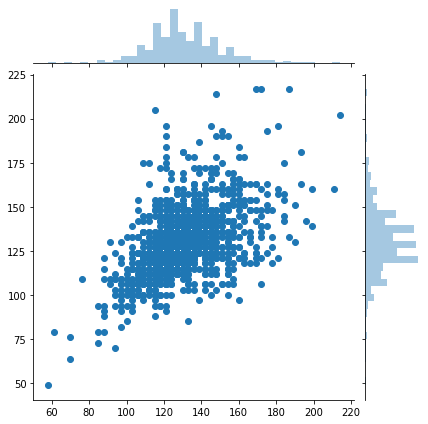

In [262]:
sns.jointplot(dim1,dim2)

In [263]:
np.mean(dim1)

130.92538461538462

In [264]:
np.mean(dim2)

130.75

In [265]:
image_shape=(130,130,3)

In [266]:
130*130*3

50700

In [267]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [268]:
#Data Augmentation
image_gen=ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255, 
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

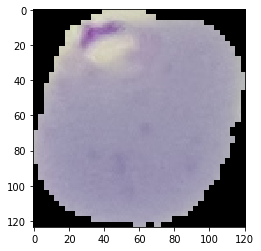

In [269]:
plt.imshow(imread(para_cell))

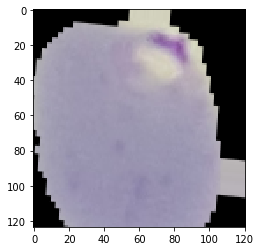

In [270]:
plt.imshow(image_gen.random_transform(imread(para_cell)))

In [271]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [272]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [273]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation

In [274]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [275]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)            

In [276]:
from tensorflow.keras.callbacks import EarlyStopping

In [277]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [278]:
batch_size=16

In [279]:
train_image_gen=image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',
                                              batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [280]:
test_image_gen=image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',
                                              batch_size=batch_size,
                                             class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [281]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [282]:
results=model.fit_generator(train_image_gen,epochs=20,
                           validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 3068s 2s/step - loss: 0.4202 - accuracy: 0.8150 - val_loss: 0.2100 - val_accuracy: 0.9381
Epoch 2/20
1560/1560 [==============================] - 1947s 1s/step - loss: 0.1945 - accuracy: 0.9409 - val_loss: 0.1716 - val_accuracy: 0.9435
Epoch 3/20
1560/1560 [==============================] - 1841s 1s/step - loss: 0.1672 - accuracy: 0.9484 - val_loss: 0.1623 - val_accuracy: 0.9488
Epoch 4/20
1560/1560 [==============================] - 1841s 1s/step - loss: 0.1606 - accuracy: 0.9490 - val_loss: 0.1792 - val_accuracy: 0.9369
Epoch 5/20
1560/1560 [==============================] - 1840s 1s/step - loss: 0.1579 - accuracy: 0.9512 - val_loss: 0.1540 - val_accuracy: 0.9496
Epoch 6/20
1560/1560 [==============================] - 1843s 1s/step - loss: 0.1555 - accuracy: 0.9508 - val_loss: 0.1500 - val_accuracy: 0.9519
Epoch 7/20
1560/1560 [==============================] - 1847s 1s/step - loss: 0.1552 - accuracy: 0.9500 - val_loss: 0.1535 -

In [283]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [284]:
losses = pd.DataFrame(model.history.history)

In [285]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.420231,0.814969,0.209962,0.938077
1,0.194508,0.940941,0.171642,0.943462
2,0.167250,0.948353,0.162337,0.948846
3,0.160634,0.948954,0.179244,0.936923
4,0.157935,0.951158,0.153998,0.949615
5,0.155491,0.950797,0.149952,0.951923
6,0.155166,0.950036,0.153474,0.946923
7,0.149440,0.951759,0.149756,0.952692
8,0.152190,0.951719,0.165939,0.946154
9,0.146569,0.952440,0.148449,0.948462


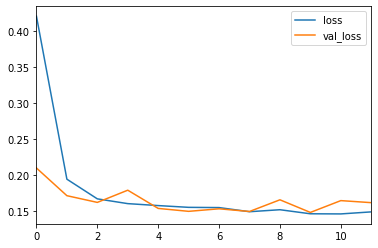

In [286]:
losses[['loss','val_loss']].plot()

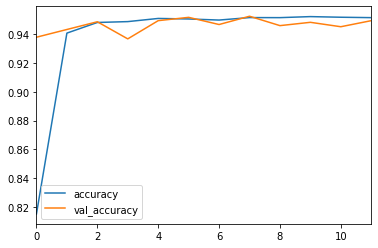

In [287]:
losses[['accuracy','val_accuracy']].plot()

In [288]:
model.metrics_names

['loss', 'accuracy']

In [289]:
model.evaluate_generator(test_image_gen)

[0.16244711202677864, 0.95153844]

In [290]:
from tensorflow.keras.preprocessing import image

In [291]:
pred_probabilities = model.predict_generator(test_image_gen)

In [292]:
pred_probabilities

array([[5.2452087e-06],
       [1.7881393e-07],
       [5.9604645e-07],
       ...,
       [9.9343979e-01],
       [9.9800360e-01],
       [9.9616623e-01]], dtype=float32)

In [293]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [294]:
predictions = pred_probabilities > 0.5

In [295]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [296]:
from sklearn.metrics import classification_report,confusion_matrix

In [297]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1300
           1       0.94      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [298]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1217,   83],
       [  42, 1258]])

In [317]:
#Predicting on random Image
uninfected_cell

'/home/ubuntu/Documents/CNNPRO/cell_images/train/uninfected/C234ThinF_IMG_20151112_162909_cell_7.png'

In [318]:
my_image = image.load_img(uninfected_cell,target_size=image_shape)

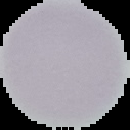

In [319]:
my_image

In [320]:
my_image = image.img_to_array(my_image)

In [321]:
type(my_image)

numpy.ndarray

In [322]:
my_image.shape

(130, 130, 3)

In [323]:
my_image = np.expand_dims(my_image, axis=0)

In [324]:
my_image.shape

(1, 130, 130, 3)

In [325]:
model.predict(my_image)

array([[1.]], dtype=float32)

In [326]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}